<a href="https://colab.research.google.com/github/mukejianya/test-ds4ph2025/blob/main/four_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
population = pd.read_csv('/Users/miaukejianya/county_pop_arcos.csv')
annual = pd.read_csv('/Users/miaukejianya/county_annual.csv')
land = pd.read_csv('/Users/miaukejianya/land_area.csv') 

In [ ]:
conn = sqlite3.connect('/Users/miaukejianya/opiod.db')

tables_query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query and fetch the results
tables = pd.read_sql_query(tables_query, conn)

# Display the tables
print(tables)

conn.close()

         name
0  population
1      annual
2        land


In [11]:
population.head(2)

,Unnamed: 0,BUYER_COUNTY,BUYER_STATE,countyfips,STATE,COUNTY,county_name,NAME,variable,year,population
0,1,AUTAUGA,AL,1001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2006,51328
1,2,BALDWIN,AL,1003,1,3,Baldwin,"Baldwin County, Alabama",B01003_001,2006,168121


In [12]:
land.head(2)

,Unnamed: 0,Areaname,STCOU,LND010190F,LND010190D,LND010190N1,LND010190N2,LND010200F,LND010200D,LND010200N1,...,LND110210N1,LND110210N2,LND210190F,LND210190D,LND210190N1,LND210190N2,LND210200F,LND210200D,LND210200N1,LND210200N2
0,1,UNITED STATES,0,0,3787425.08,0,0,0,3794083.06,0,...,0,0,0,251083.35,0,0,0,256644.62,0,0
1,2,ALABAMA,1000,0,52422.94,0,0,0,52419.02,0,...,0,0,0,1672.71,0,0,0,1675.01,0,0


In [13]:
annual.head(2)

,Unnamed: 0,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
0,1,ABBEVILLE,SC,2006,877,363620.0,45001.0
1,2,ABBEVILLE,SC,2007,908,402940.0,45001.0


In [22]:
annual_average_pills = annual.groupby('year')['count'].mean().reset_index()

print(annual_average_pills.head())

   year        count
0  2006  6725.041935
1  2007  7429.199546
2  2008  7946.208902
3  2009  8247.823854
4  2010  8871.797073


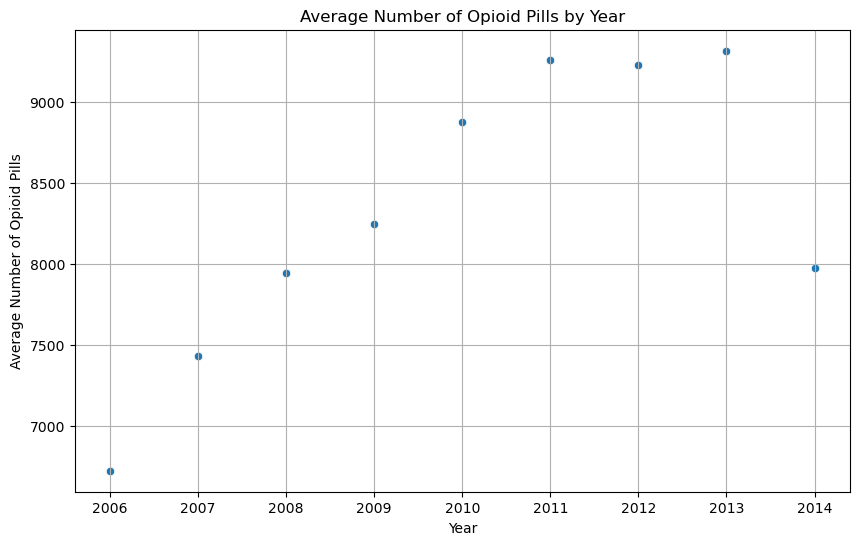

In [23]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=annual_average_pills, x='year', y='count', marker='o')

# Customize the plot
plt.title('Average Number of Opioid Pills by Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Opioid Pills')
plt.grid(True)

# Show the plot
plt.show()


## R from Python

In [37]:
import rpy2
import rpy2.rinterface as ri
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

In [31]:
r_code = '''
library(tidyverse)
            
#read in the data
population <- read_csv("https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_pop_arcos.csv")
annual <- read_csv("https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_annual.csv")
land <- read_csv("https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/land_area.csv") 

names(population)
names(annual)
names(land)

#check and clean the data following steps from the online textbook
population %>% 
    select(countyfips, population, year) %>%
    head()

annual %>%
    filter(is.na(countyfips) | countyfips == "NA") %>%
    select(BUYER_COUNTY, BUYER_STATE, countyfips) %>%
    distinct()

annual %>% 
    filter(BUYER_STATE != "PR") %>%
    count(BUYER_STATE) %>%
    print(n=56)

annual <- annual %>%
  mutate(countyfips = if_else(
    is.na(countyfips) & BUYER_COUNTY == "MONTGOMERY" & BUYER_STATE == "AR", 
    "05097", 
    countyfips
  ))

  annual <- annual %>%
  filter(!is.na(countyfips))

land_area <- land %>%
  select(STCOU, Areaname, LND110210D) %>%
  rename(countyfips = STCOU)


annual_joined <- annual %>%
left_join(population, by = c("countyfips", "year")) %>%
left_join(land_area, by = "countyfips")
'''

In [32]:
ro.r(r_code)

New names:
• `` -> `...1`
Rows: 28265 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): BUYER_COUNTY, BUYER_STATE, countyfips, county_name, NAME, variable
dbl (5): ...1, STATE, COUNTY, year, population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 27758 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): BUYER_COUNTY, BUYER_STATE, countyfips
dbl (4): ...1, year, count, DOSAGE_UNIT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 3198 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): Areaname, STCOU, LND010190N1, LND0

In [38]:
# Access the final R object `annual_joined` from R
opioid_df = ro.r['annual_joined']

pandas2ri.activate()

# Convert to pandas DataFrame
opioid_pd = pandas2ri.rpy2py(opioid_df)

# Show first few rows
print(opioid_pd.head())

   ...1.x BUYER_COUNTY.x BUYER_STATE.x    year   count  DOSAGE_UNIT  \
1     1.0      ABBEVILLE            SC  2006.0   877.0     363620.0   
2     2.0      ABBEVILLE            SC  2007.0   908.0     402940.0   
3     3.0      ABBEVILLE            SC  2008.0   871.0     424590.0   
4     4.0      ABBEVILLE            SC  2009.0   930.0     467230.0   
5     5.0      ABBEVILLE            SC  2010.0  1197.0     539280.0   

  countyfips   ...1.y BUYER_COUNTY.y BUYER_STATE.y  STATE  COUNTY county_name  \
1      45001   2313.0      ABBEVILLE            SC   45.0     1.0   Abbeville   
2      45001   5455.0      ABBEVILLE            SC   45.0     1.0   Abbeville   
3      45001   8597.0      ABBEVILLE            SC   45.0     1.0   Abbeville   
4      45001  11737.0      ABBEVILLE            SC   45.0     1.0   Abbeville   
5      45001  14877.0      ABBEVILLE            SC   45.0     1.0   Abbeville   

                               NAME    variable  population       Areaname  \
1  Abbev